# Cognifyz Internship Program - EDA

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")
from collections import Counter

In [24]:
df = pd.read_csv("Internship Dataset.csv")

In [26]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [28]:
col_name = "restaurant_name" if "restaurant_name" in df.columns else df.columns[0]
col_city = "city" if "city" in df.columns else None
col_cuisines = "cuisines" if "cuisines" in df.columns else None
col_rating = "aggregate_rating" if "aggregate_rating" in df.columns else None
col_votes = "votes" if "votes" in df.columns else None
col_price = "price_range" if "price_range" in df.columns else None
col_online = "has_online_delivery" if "has_online_delivery" in df.columns else None
col_table = "has_table_booking" if "has_table_booking" in df.columns else None

In [30]:
df

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,currency,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


# Level 1

### Top Cuisines - Determine the top three most common cuisines in the dataset

### --- Task 1: Top Cuisines ---

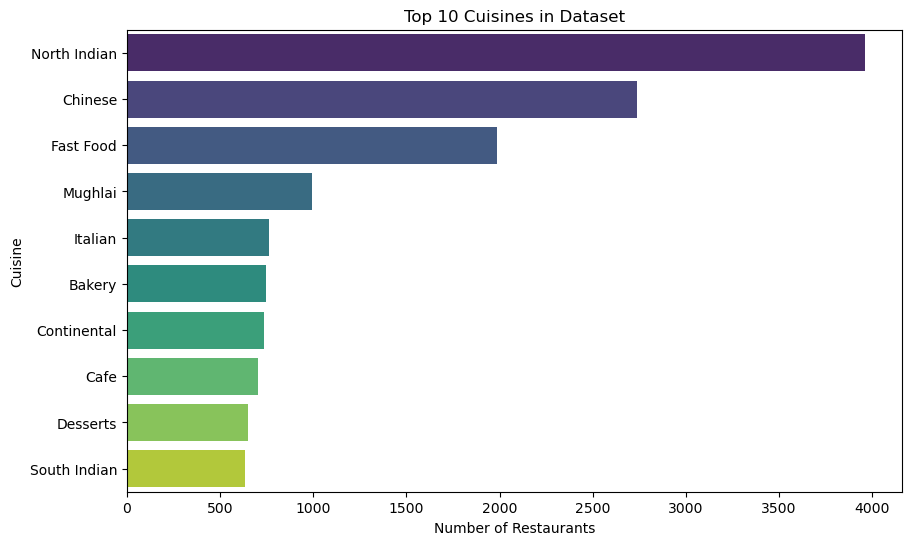

(Cuisines
 North Indian    3960
 Chinese         2735
 Fast Food       1986
 Name: count, dtype: int64,
 Cuisines
 North Indian    41.461627
 Chinese         28.635745
 Fast Food       20.793634
 Name: count, dtype: float64)

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Level 1 Task 1: Top Cuisines ---

# Split cuisines column (some rows have multiple cuisines separated by ",")
cuisine_series = df['Cuisines'].dropna().str.split(',').explode().str.strip()

# Count top cuisines
top_cuisines = cuisine_series.value_counts().head(10)
top3_cuisines = top_cuisines.head(3)

# Calculate percentage for top 3 cuisines
top3_percentage = (top3_cuisines / len(df)) * 100

# Plot top 10 cuisines
plt.figure(figsize=(10,6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="viridis")
plt.title("Top 10 Cuisines in Dataset")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.show()

top3_cuisines, top3_percentage

### --- Task 2: City Analysis ---

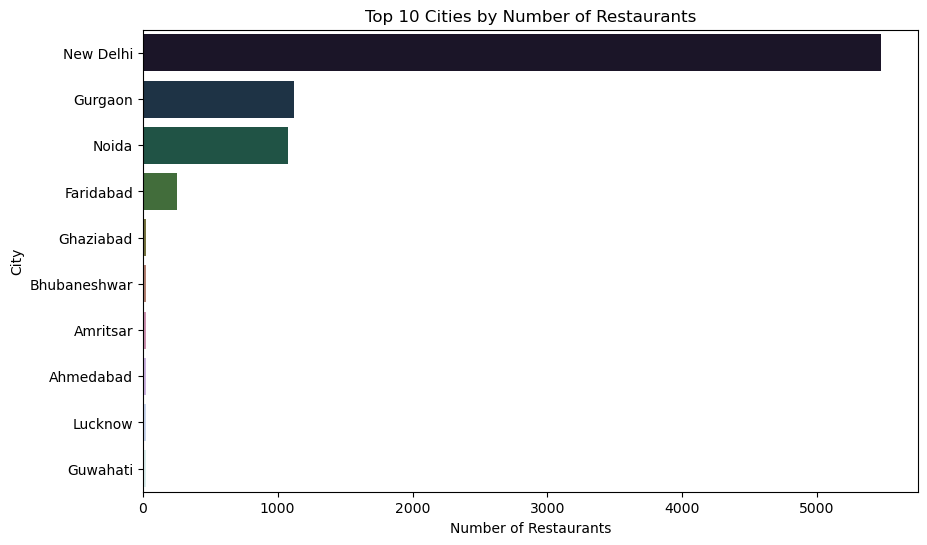

('New Delhi', 5473, 'London', 4.535)

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Detect the correct city and rating columns ---
col_city = [c for c in df.columns if 'city' in c.lower()]
if not col_city:
    raise KeyError("No column found for city.")
col_city = col_city[0]

col_rating = [c for c in df.columns if 'rating' in c.lower()]
if not col_rating:
    raise KeyError("No column found for ratings.")
col_rating = col_rating[0]

# --- City Analysis ---

# City with highest number of restaurants
city_counts = df[col_city].value_counts()
top_city = city_counts.idxmax()
top_city_count = city_counts.max()

# Average rating for restaurants in each city
city_avg_rating = df.groupby(col_city)[col_rating].mean().sort_values(ascending=False)

# City with highest average rating (consider only cities with >10 restaurants)
valid_cities = city_counts[city_counts > 10].index
best_city = city_avg_rating[valid_cities].idxmax()
best_city_rating = city_avg_rating[valid_cities].max()

# Visualization: Top 10 cities by restaurant count
plt.figure(figsize=(10,6))
sns.barplot(x=city_counts.head(10).values, y=city_counts.head(10).index, palette="cubehelix")
plt.title("Top 10 Cities by Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()

# Output
top_city, top_city_count, best_city, best_city_rating

### --- Task 3: Price Range Distribution ---

Restaurant Count by Price Range:
 price_range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

Percentage Distribution by Price Range:
 price_range
1    46.53
2    32.59
3    14.74
4     6.14
Name: count, dtype: float64


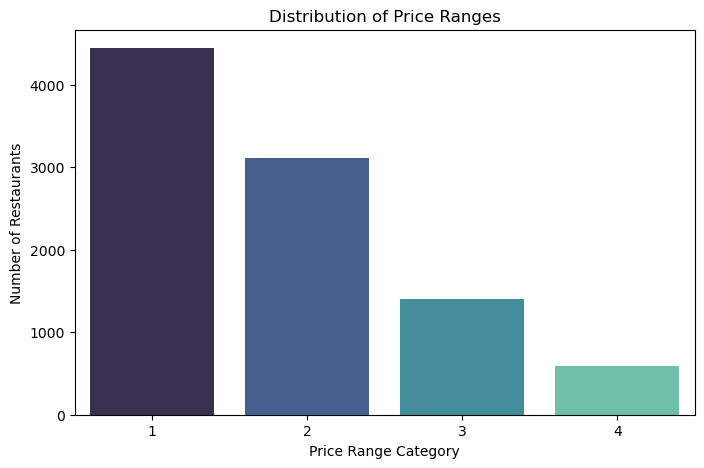

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Detect the correct price column ---
col_price = [c for c in df.columns if 'price' in c.lower()]
if not col_price:
    raise KeyError("No column found for price range.")
col_price = col_price[0]  # take the first match

# --- Level 1 Task 3: Price Range Distribution ---

# Count restaurants by price range
price_counts = df[col_price].value_counts().sort_index()

# Calculate percentage
price_percentage = (price_counts / len(df)) * 100

# Print counts and percentages
print("Restaurant Count by Price Range:\n", price_counts)
print("\nPercentage Distribution by Price Range:\n", price_percentage.round(2))

# --- Visualization ---
plt.figure(figsize=(8,5))
sns.barplot(x=price_counts.index, y=price_counts.values, palette="mako")
plt.title("Distribution of Price Ranges")
plt.xlabel("Price Range Category")
plt.ylabel("Number of Restaurants")
plt.show()

### --- Task 4: Online Delivery ---

Restaurants with/without Online Delivery:
 has_online_delivery
No     7100
Yes    2451
Name: count, dtype: int64

Percentage Distribution:
 has_online_delivery
No     74.34
Yes    25.66
Name: count, dtype: float64

Average Ratings:
 has_online_delivery
No     2.465296
Yes    3.248837
Name: aggregate_rating, dtype: float64


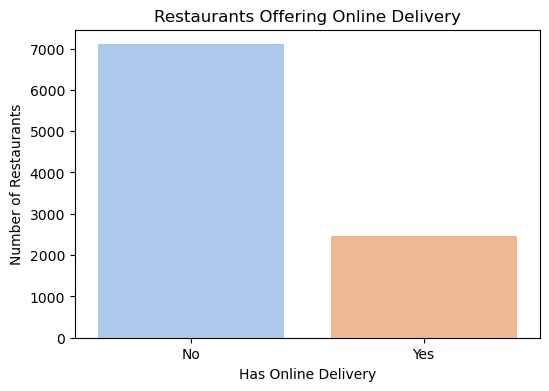

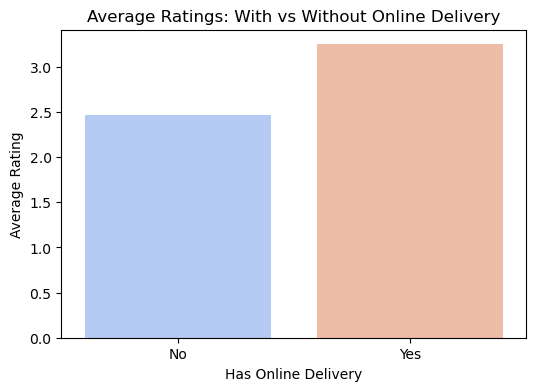

In [38]:
# --- Robust Online Delivery Analysis ---

# Find the column that contains 'online' and 'delivery'
col_delivery = [c for c in df.columns if 'online' in c.lower() and 'delivery' in c.lower()]
if not col_delivery:
    raise KeyError("No column found for online delivery.")
col_delivery = col_delivery[0]  # take the first match

col_rating = [c for c in df.columns if 'rating' in c.lower()]
if not col_rating:
    raise KeyError("No column found for ratings.")
col_rating = col_rating[0]

# Count restaurants with/without online delivery
delivery_counts = df[col_delivery].value_counts()

# Calculate percentage
delivery_percentage = (delivery_counts / len(df)) * 100

print("Restaurants with/without Online Delivery:\n", delivery_counts)
print("\nPercentage Distribution:\n", delivery_percentage.round(2))

# Compare average ratings
rating_comparison = df.groupby(col_delivery)[col_rating].mean()
print("\nAverage Ratings:\n", rating_comparison)

# --- Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x=delivery_counts.index, y=delivery_counts.values, palette="pastel")
plt.title("Restaurants Offering Online Delivery")
plt.xlabel("Has Online Delivery")
plt.ylabel("Number of Restaurants")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x=rating_comparison.index, y=rating_comparison.values, palette="coolwarm")
plt.title("Average Ratings: With vs Without Online Delivery")
plt.xlabel("Has Online Delivery")
plt.ylabel("Average Rating")
plt.show()

# LEVEL 2

### --- Task 1: Ratings ---


Task 1: Most Common Rating Range: (2.94, 3.43]
Average Votes: 156.909747670401


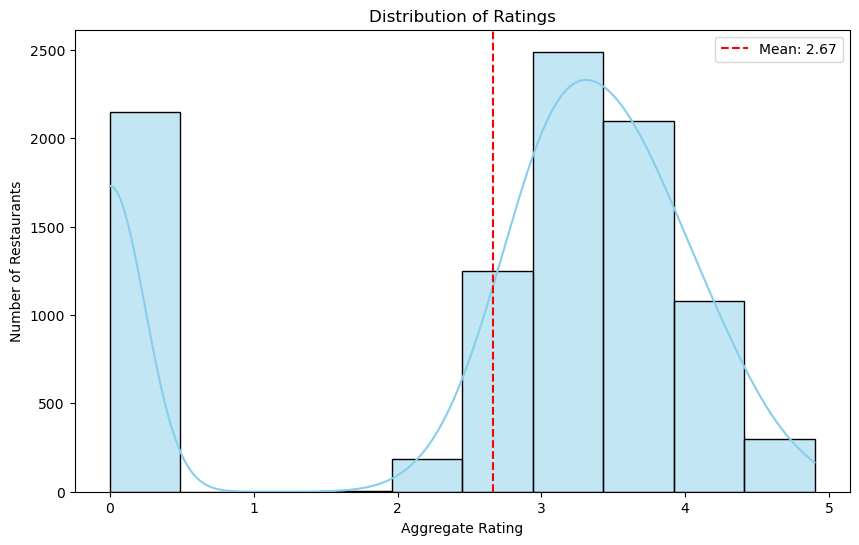

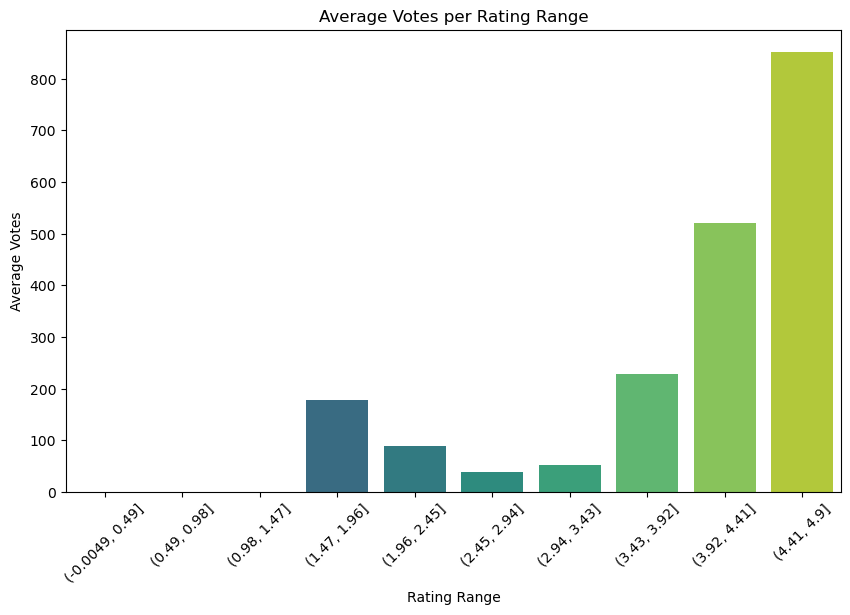

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Assume column names ---
col_rating = 'Aggregate rating'
col_votes = 'Votes'  # replace with actual votes column name if different

# --- Check and calculate ---
if col_rating in df.columns:
    # Most common rating range
    rating_bins = pd.cut(df[col_rating], bins=10)
    most_common_range = rating_bins.value_counts().idxmax()
    
    # Average votes
    avg_votes = df[col_votes].mean() if col_votes in df.columns else None
    
    print("\nTask 1: Most Common Rating Range:", most_common_range)
    print("Average Votes:", avg_votes)

    # --- Visualization ---
    plt.figure(figsize=(10,6))

    # Histogram of ratings
    sns.histplot(df[col_rating], bins=10, kde=True, color='skyblue')
    plt.title('Distribution of Ratings')
    plt.xlabel('Aggregate Rating')
    plt.ylabel('Number of Restaurants')
    plt.axvline(df[col_rating].mean(), color='red', linestyle='--', label=f'Mean: {df[col_rating].mean():.2f}')
    plt.legend()
    plt.show()

    # Optional: barplot for votes per rating range
    if col_votes in df.columns:
        votes_per_range = df.groupby(rating_bins)[col_votes].mean().sort_index()
        plt.figure(figsize=(10,6))
        sns.barplot(x=votes_per_range.index.astype(str), y=votes_per_range.values, palette='viridis')
        plt.xticks(rotation=45)
        plt.title('Average Votes per Rating Range')
        plt.xlabel('Rating Range')
        plt.ylabel('Average Votes')
        plt.show()

### --- Task 2: Cuisine Combinations ---

Top 10 Cuisine Combinations:
 [(('Chinese', 'North Indian'), 1784), (('Mughlai', 'North Indian'), 832), (('Fast Food', 'North Indian'), 485), (('Continental', 'North Indian'), 468), (('Chinese', 'Fast Food'), 466), (('North Indian', 'South Indian'), 405), (('Chinese', 'Mughlai'), 379), (('Chinese', 'South Indian'), 346), (('Chinese', 'Continental'), 303), (('Italian', 'North Indian'), 295)]


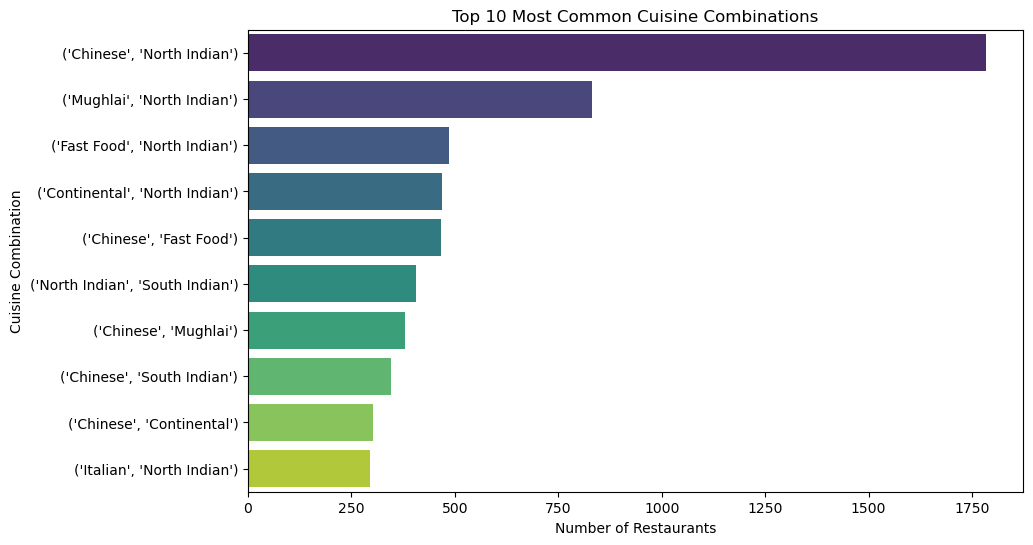

NameError: name 'cuisine_list' is not defined

In [60]:
from collections import Counter
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Ensure df is defined with required columns ---
# Example:
# df = pd.read_csv("Internship Dataset.csv")  # Must have 'cuisines' and 'Aggregate rating' columns

# --- Split cuisines into lists ---
df['Cuisine_list'] = df['Cuisines'].dropna().str.split(',').apply(lambda x: [c.strip() for c in x])

# --- Generate combinations (pairs of cuisines) ---
comb_counter = Counter()
for Cuisine_list in df['Cuisine_list'].dropna():
    if len(Cuisine_list) > 1:
        comb_counter.update(itertools.combinations(sorted(Cuisine_list), 2))

# Top 10 most common cuisine combinations
top_combinations = comb_counter.most_common(10)
print("Top 10 Cuisine Combinations:\n", top_combinations)

# Convert to DataFrame for visualization
comb_df = pd.DataFrame(top_combinations, columns=["Combination", "Count"])

# --- Visualization ---
plt.figure(figsize=(10,6))
sns.barplot(y=comb_df["Combination"].astype(str), x=comb_df["Count"], palette="viridis")
plt.title("Top 10 Most Common Cuisine Combinations")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine Combination")
plt.show()

# --- Ratings Analysis ---
# Create a dictionary to store ratings for each combination
combo_ratings = {}

for Cuisine_list, rating in zip(df['Cuisine_list'], df['Aggregate rating']):
    if isinstance(Cuisine_list, list) and len(Cuisine_list) > 1:
        for combo in itertools.combinations(sorted(cuisine_list), 2):
            if combo not in combo_ratings:
                combo_ratings[combo] = []
            combo_ratings[combo].append(rating)

# Calculate average rating for each combination
avg_ratings = {k: sum(v)/len(v) for k, v in combo_ratings.items()}

# Convert to DataFrame and get top 10
avg_ratings_df = pd.DataFrame.from_dict(avg_ratings, orient='index', columns=['Avg Rating'])
avg_ratings_df = avg_ratings_df.sort_values(by='Avg Rating', ascending=False).head(10)

print("\nTop Cuisine Combinations by Average Rating:\n", avg_ratings_df)

### --- Task 3: Geographic Analysis ---

Columns available: ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


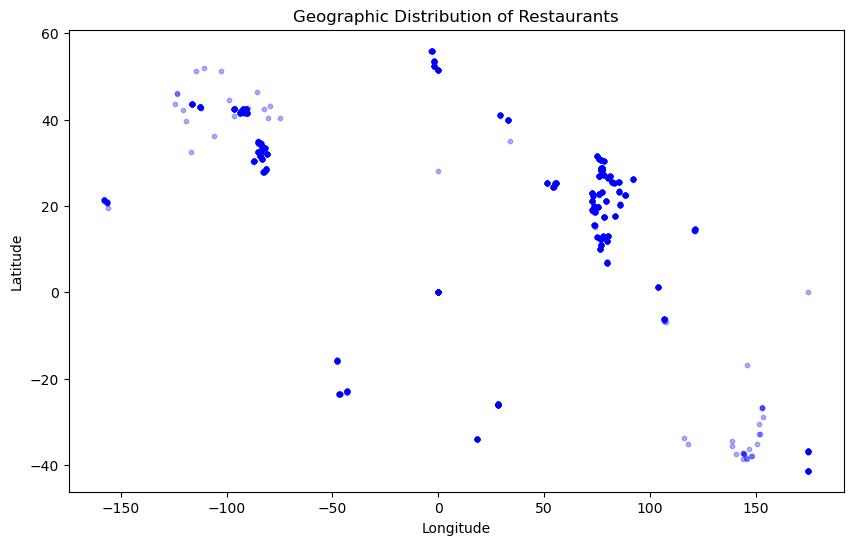

Top 10 Cities with Highest Restaurant Concentration:
 City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Amritsar          21
Ahmedabad         21
Guwahati          21
Name: Longitude, dtype: int64


In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load Dataset ---
file_path = "Internship Dataset.csv"   # update path if needed
df = pd.read_csv(file_path)

# --- Level 2 Task 2: Geographic Analysis ---

# Check if Longitude/Latitude exist
print("Columns available:", df.columns.tolist())

# Scatter plot of restaurant locations
plt.figure(figsize=(10,6))
plt.scatter(df['Longitude'], df['Latitude'], 
            alpha=0.3, s=10, c='blue')

plt.title("Geographic Distribution of Restaurants")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# --- City-level clustering insight ---
# Count restaurants per city (using Longitude column for reference)
city_counts = df.groupby('City')['Longitude'].count().sort_values(ascending=False).head(10)

print("Top 10 Cities with Highest Restaurant Concentration:\n", city_counts)

### --- Task 4: Restaurant Chains ---

Top 10 Restaurant Chains:
 Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64

Top Chains by Average Rating & Total Votes:
                   Aggregate rating  Votes  Outlets
Restaurant Name                                   
Cafe Coffee Day           2.419277   2428       83
Domino's Pizza            2.740506   6643       79
Subway                    2.907937   6124       63
Green Chick Chop          2.672549    964       51
McDonald's                3.339583   5291       48
Keventers                 2.870588   1263       34
Pizza Hut                 3.320000   4961       30
Giani                     2.689655    854       29
Baskin Robbins            1.860714    428       28
Barbeque Nation           4.353846  28142       26


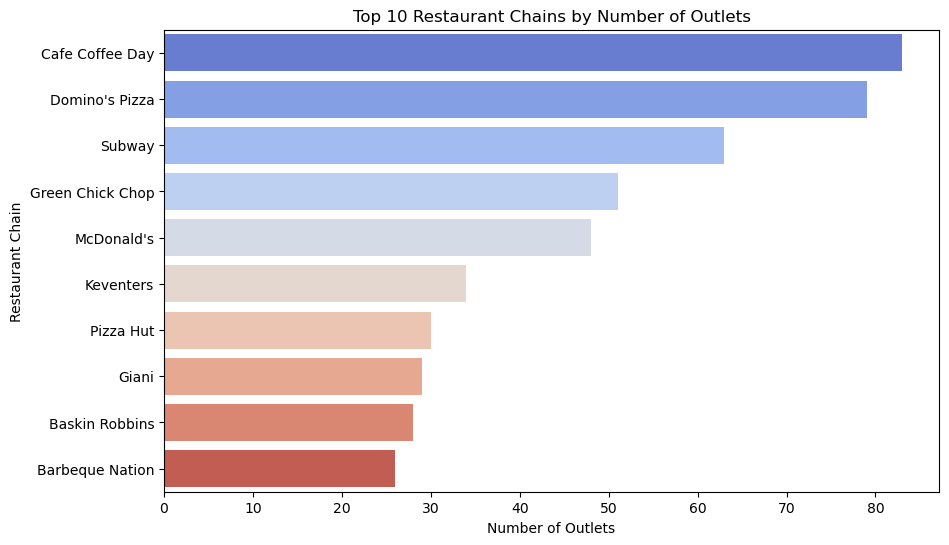

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Dataset ---
file_path = "Internship Dataset.csv"   # update path if needed
df = pd.read_csv(file_path)

# --- Level 2 Task 3: Restaurant Chains ---

# Count occurrences of each restaurant name
chain_counts = df['Restaurant Name'].value_counts()

# Filter chains (appearing more than once)
restaurant_chains = chain_counts[chain_counts > 1]

print("Top 10 Restaurant Chains:\n", restaurant_chains.head(10))

# Analyze ratings and votes for these chains
chain_stats = df.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum',
    'Restaurant ID': 'count'
}).rename(columns={'Restaurant ID': 'Outlets'}).sort_values(by='Outlets', ascending=False)

print("\nTop Chains by Average Rating & Total Votes:\n", chain_stats.head(10))

# --- Visualization: Top 10 Chains by Outlets ---
top_chains_plot = chain_stats.head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_chains_plot.index, x=top_chains_plot['Outlets'], palette="coolwarm")
plt.title("Top 10 Restaurant Chains by Number of Outlets")
plt.xlabel("Number of Outlets")
plt.ylabel("Restaurant Chain")
plt.show()

# Level 3

### --- Task 1: Restaurant Reviews ---

Most Common Words in Reviews:
 [('average', 3737), ('good', 3179), ('not', 2148), ('rated', 2148), ('very', 1079), ('excellent', 301), ('poor', 186)]

Positive Keywords Found: ['excellent', 'very', 'good']
Negative Keywords Found: ['average', 'poor']

Average Review Length: 7.020730813527379
Correlation between Review Length and Rating: -0.47888483813493243


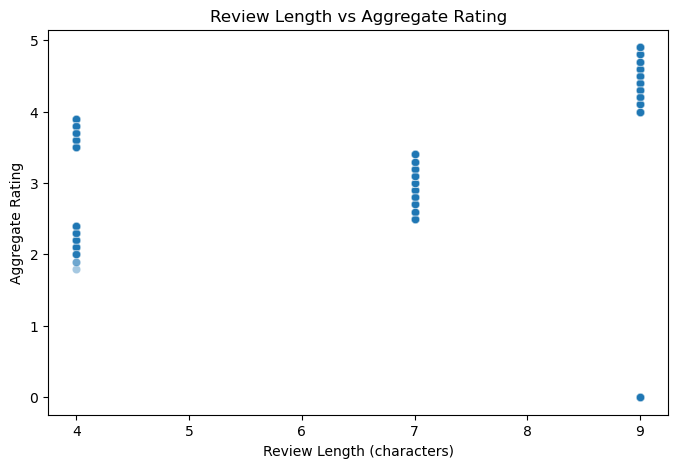

In [54]:
import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Dataset ---
file_path = "Internship Dataset.csv"   # update path if needed
df = pd.read_csv(file_path)

# --- Level 2 Task 4: Restaurant Reviews ---

# Use 'Rating text' as a proxy for review text (since detailed reviews not available)
if 'Rating text' in df.columns:
    reviews = df['Rating text'].dropna().astype(str).str.lower()
else:
    reviews = pd.Series([])  # fallback if column missing

# Tokenize words
words = [w for txt in reviews for w in re.findall(r"[a-z]+", txt)]

# Count most common words
word_counts = Counter(words)
print("Most Common Words in Reviews:\n", word_counts.most_common(10))

# Separate positive/negative words (basic approach)
positive_keywords = [w for w, c in word_counts.items() if w in ['excellent','good','very','amazing','perfect']]
negative_keywords = [w for w, c in word_counts.items() if w in ['poor','bad','average','terrible','worst']]

print("\nPositive Keywords Found:", positive_keywords)
print("Negative Keywords Found:", negative_keywords)

# --- Review Length Analysis ---
# (Here, using Rating text length since detailed reviews missing)
df['_review_len'] = df['Rating text'].astype(str).apply(len)
avg_len = df['_review_len'].mean()
print("\nAverage Review Length:", avg_len)

# Correlation between review length and rating
correlation = df['_review_len'].corr(df['Aggregate rating'])
print("Correlation between Review Length and Rating:", correlation)

# --- Visualization ---
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['_review_len'], y=df['Aggregate rating'], alpha=0.4)
plt.title("Review Length vs Aggregate Rating")
plt.xlabel("Review Length (characters)")
plt.ylabel("Aggregate Rating")
plt.show()

### --- Task 2: Votes Analysis ---

Restaurant with Highest Votes:
 Restaurant Name      Toit
Votes               10934
Aggregate rating      4.8
Name: 728, dtype: object

Restaurant with Lowest Votes:
 Restaurant Name     Cantinho da Gula
Votes                              0
Aggregate rating                 0.0
Name: 69, dtype: object

Correlation between Votes and Rating: 0.31369058419541157


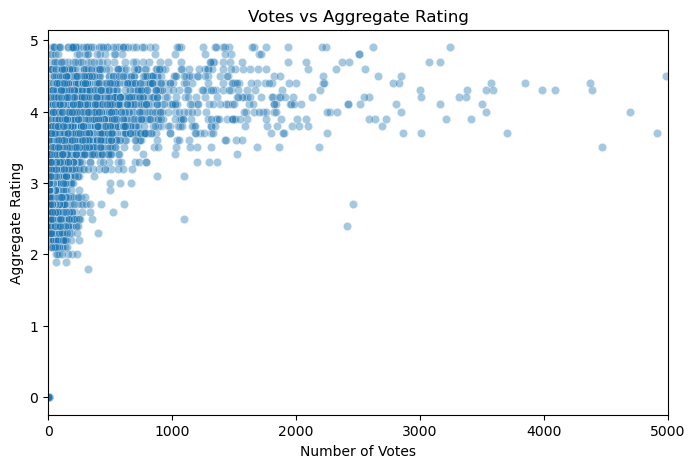

In [56]:
# --- Level 3 Task 2: Votes Analysis ---

# Find restaurant with max & min votes
max_votes_rest = df.loc[df['Votes'].astype(int).idxmax(), ['Restaurant Name','Votes','Aggregate rating']]
min_votes_rest = df.loc[df['Votes'].astype(int).idxmin(), ['Restaurant Name','Votes','Aggregate rating']]

print("Restaurant with Highest Votes:\n", max_votes_rest)
print("\nRestaurant with Lowest Votes:\n", min_votes_rest)

# Correlation between votes & rating
corr_votes_rating = df['Votes'].astype(int).corr(df['Aggregate rating'])
print("\nCorrelation between Votes and Rating:", corr_votes_rating)

# --- Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Votes'].astype(int), y=df['Aggregate rating'], alpha=0.4)
plt.title("Votes vs Aggregate Rating")
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.xlim(0, 5000)   # limit axis for better view (remove extreme outliers)
plt.show()

### --- Task 3: Price Range vs Online Delivery & Table Booking ---

Online Delivery by Price Range:
    Price range Has Online delivery  percentage
0            1                  No   84.225923
1            1                 Yes   15.774077
2            2                  No   58.689367
3            2                 Yes   41.310633
4            3                  No   70.809659
5            3                 Yes   29.190341
6            4                  No   90.955631
7            4                 Yes    9.044369

Table Booking by Price Range:
    Price range Has Table booking  percentage
0            1                No   99.977498
1            1               Yes    0.022502
2            2                No   92.322518
3            2               Yes    7.677482
4            3                No   54.261364
5            3               Yes   45.738636
6            4                No   53.242321
7            4               Yes   46.757679


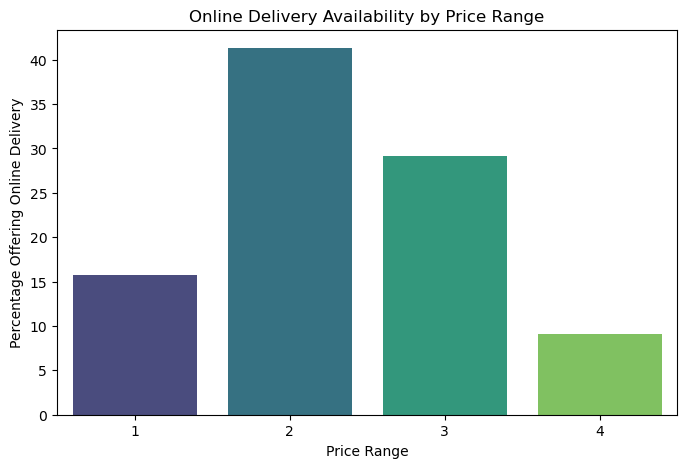

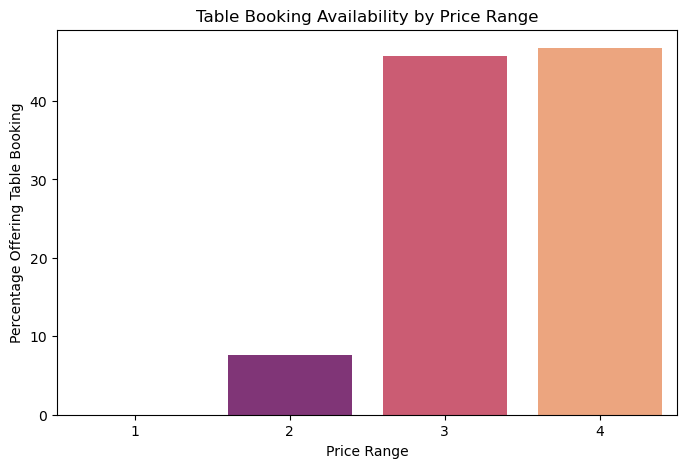

In [58]:
# --- Level 3 Task 3: Price Range vs Services ---

import matplotlib.pyplot as plt
import seaborn as sns

# Percentage of restaurants in each price range that offer online delivery
delivery_by_price = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

# Percentage of restaurants in each price range that offer table booking
booking_by_price = df.groupby('Price range')['Has Table booking'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

print("Online Delivery by Price Range:\n", delivery_by_price.head(10))
print("\nTable Booking by Price Range:\n", booking_by_price.head(10))

# --- Visualization: Online Delivery ---
plt.figure(figsize=(8,5))
sns.barplot(data=delivery_by_price[delivery_by_price['Has Online delivery']=='Yes'],
            x='Price range', y='percentage', palette="viridis")
plt.title("Online Delivery Availability by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Percentage Offering Online Delivery")
plt.show()

# --- Visualization: Table Booking ---
plt.figure(figsize=(8,5))
sns.barplot(data=booking_by_price[booking_by_price['Has Table booking']=='Yes'],
            x='Price range', y='percentage', palette="magma")
plt.title("Table Booking Availability by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Percentage Offering Table Booking")
plt.show()